#**Implementation of K-Means**

**Importing data**

In [ ]:
# importing pandas libraries
import pandas as pd

In [ ]:
# Reading the Mall customer file 
data=pd.read_csv("/Mall_Customers.csv", encoding= 'unicode_escape')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Preprocessing of data**

In [ ]:
# To list all the columns of the dataset
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Getting the entire description of the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# To calculate the number of null values in the dataset
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# To get the description of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Mapping the column Gender into binary data 0 and 1
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Applying K-means for Mall Customer Segmentation**

In [ ]:
# Importing numpy
import numpy as np

In [ ]:
# Tranforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [ ]:
from sklearn.cluster import KMeans

**Determine the value of k using Elbow Method**

In [ ]:
# Importing the libraries required for calculating K 
from sklearn import metrics
from scipy.spatial.distance import cdist

**Two methods for calculating the value of k**

---

**Distortion:** 
It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

---


**Inertia:** 
It is the sum of squared distances of samples to their closest cluster center.

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

In [ ]:
# Using Different Values of distortion
print("K : value")
for key, val in mapping1.items():
    print(f'{key} : {val}')

K : value
1 : 35.58782757352547
2 : 30.122051138558877
3 : 24.020507648685765
4 : 20.47612410788973
5 : 17.778570925966157
6 : 15.448663692811202
7 : 14.593078466557177
8 : 13.84302430299848
9 : 13.349554167242864


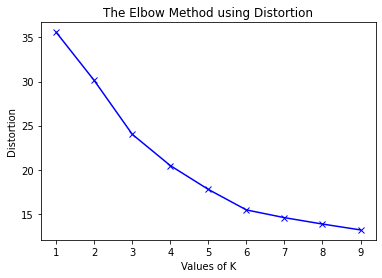

In [ ]:
# Plotting the data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# Using Different Values of inertia
print("K : value")
for key, val in mapping2.items():
    print(f'{key} : {val}')

K : value
1 : 308862.06000000006
2 : 212889.44245524297
3 : 143391.59236035682
4 : 104414.67534220166
5 : 75427.71182424155
6 : 58348.64136331505
7 : 51147.01731797614
8 : 44391.820804870804
9 : 42127.65504495504


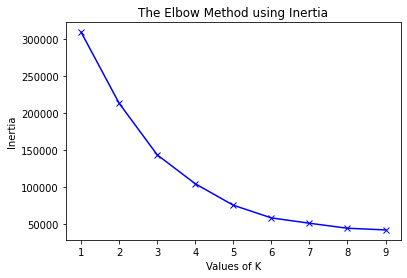

In [ ]:
# Plotting the data
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From both the graphs plotted we can find that the best value for k is 5 

In [ ]:
# Applying Kmeans 
clusterNum = 5
k_means=KMeans(init="k-means++",n_clusters=clusterNum,n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [ ]:
# Setting labels for data with column name "Clus_km"
data["Clus_km"] = labels
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [ ]:
# Finding mean for "Clus_km"
data.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,162.000000,0.461538,32.692308,86.538462,82.128205
1,86.265823,0.417722,43.088608,55.291139,49.569620
2,163.500000,0.527778,40.666667,87.750000,17.583333
3,24.000000,0.391304,25.521739,26.304348,78.565217
4,23.000000,0.391304,45.217391,26.304348,20.913043


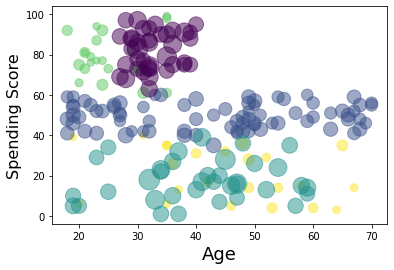

In [ ]:
import matplotlib.pyplot as plt
area = np.pi * ( X[:, 2])
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.show()

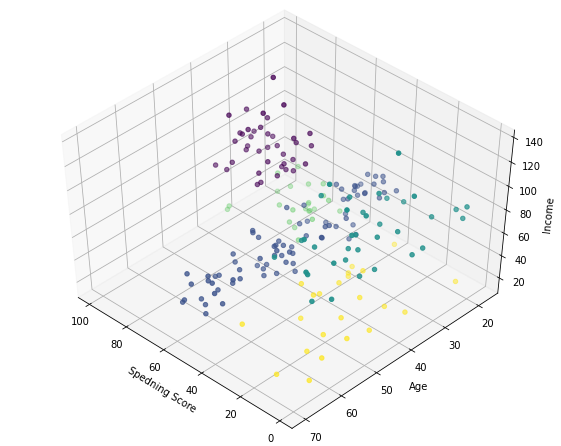

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Spedning Score')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float))